In [1]:
# %%
# Install packages
# install.packages(c("tidyverse", "caret", "randomForest", "xgboost", "Metrics", "corrplot", "MLmetrics"))

In [2]:
# install.packages("MLmetrics")

In [3]:
# Import các thư viện
library(tidyverse)
library(caret)
library(e1071)
library(MLmetrics)
library(Metrics)
library(data.table)

Warning message:
"package 'tidyverse' was built under R version 4.5.1"
Warning message:
"package 'ggplot2' was built under R version 4.5.1"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'MLmetrics'


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall


Warning message:
"package 'Metrics

In [4]:
# Đọc dữ liệu
df <- read_csv("D:/Khang/FPT semester/semester_5/DSR301m/project_assignment/attempt/breast-cancer.csv")

Rows: 569 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# Hiển thị dữ liệu đầu
head(df)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
# Thông tin tổng quan
print(str(df))

spc_tbl_ [569 × 32] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                     : num [1:569] 842302 842517 84300903 84348301 84358402 ...
 $ diagnosis              : chr [1:569] "M" "M" "M" "M" ...
 $ radius_mean            : num [1:569] 18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num [1:569] 10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num [1:569] 122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num [1:569] 1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num [1:569] 0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num [1:569] 0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num [1:569] 0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave_points_mean    : num [1:569] 0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num [1:569] 0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num [1:569] 0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num [1:569] 1.095 0.543 0.7

In [7]:
# Kiểm tra giá trị bị thiếu
print(colSums(is.na(df)))

                     id               diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                       0 
    concave_points_mean           symmetry_mean  fractal_dimension_mean 
                      0                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave_points_se             symmetry_se 
                      0                       0    

In [8]:
# Gán 'radius_mean' sang cột mới rồi xóa cột cũ
df$radius_mean_target <- df$radius_mean
df <- df[, !(names(df) %in% c("radius_mean"))]

# Xem dữ liệu sau khi thay đổi
head(df)

# Xóa cột 'id'
df <- df[, !(names(df) %in% c("id"))]

head(df)

id,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_target
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,17.99
842517,M,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,20.57
84300903,M,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,19.69
84348301,M,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,11.42
84358402,M,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,20.29
843786,M,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,12.45


diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_target
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,17.99
M,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,20.57
M,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,19.69
M,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,11.42
M,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,20.29
M,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,12.45


In [9]:
# Mã hóa 'diagnosis' (B = 0, M = 1)
df$diagnosis <- as.integer(as.factor(df$diagnosis)) - 1  # tương đương LabelEncoder trong Python

# Lưu model LabelEncoder (dùng RDS trong R thay cho joblib)
saveRDS(df$diagnosis, "label_encoder.rds")

# Thống kê giá trị
table(df$diagnosis)



  0   1 
357 212 

corrplot 0.95 loaded



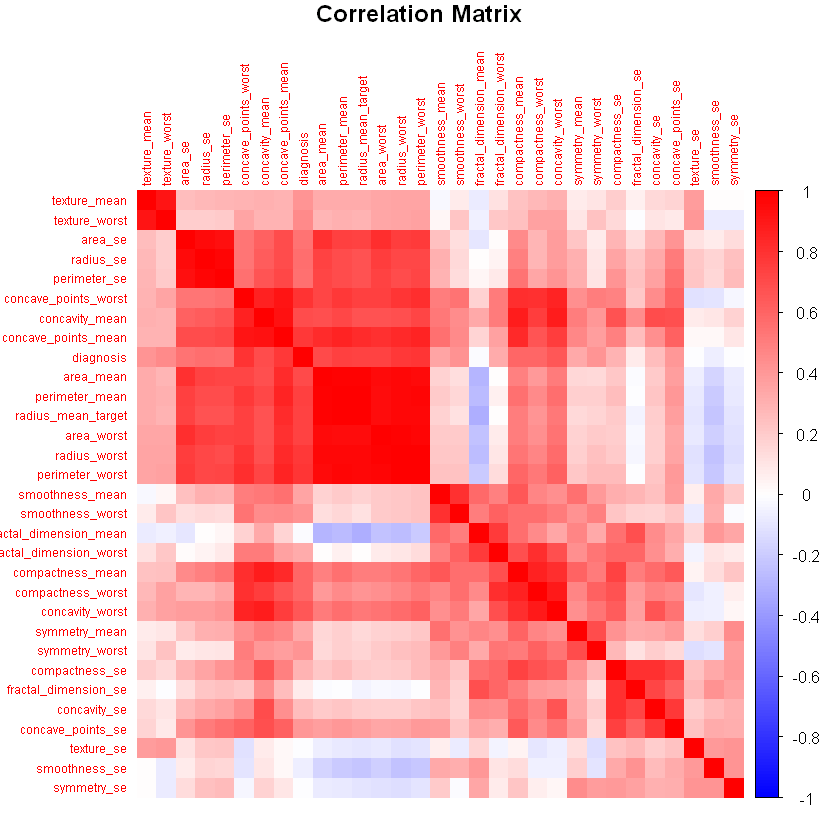

In [10]:
# Ma trận tương quan
corr_matrix <- cor(df)
library(corrplot)

# Vẽ heatmap
corrplot::corrplot(corr_matrix, method = "color", tl.cex = 0.6, number.cex = 0.5,
                   col=colorRampPalette(c("blue", "white", "red"))(200),
                   title = "Correlation Matrix", mar = c(0,0,1,0), order = "hclust")


In [ ]:
# Lựa chọn các đặc trưng
# selected_features <- c("perimeter_mean", "area_mean", "concavity_mean",
#   "concave_points_mean", "radius_se", "perimeter_se",
#   "area_se", "radius_worst", "perimeter_worst",
#   "area_worst", "concave_points_worst"
# )

selected_features <- c(
  "perimeter_mean", "compactness_mean", "area_mean", "concavity_mean",
   "concavity_se", "perimeter_se",  "radius_worst"
)

features <- df[, selected_features]
target <- df$radius_mean_target

In [12]:
cat(sprintf("Features shape: %d rows, %d columns\n", nrow(features), ncol(features)))
cat(sprintf("Target shape: %d rows\n", length(target)))


Features shape: 569 rows, 7 columns
Target shape: 569 rows


In [13]:
# Chia dữ liệu
set.seed(42)
train_indices <- createDataPartition(target, p = 0.8, list = FALSE)
X_train <- features[train_indices, ]
X_test  <- features[-train_indices, ]
y_train <- target[train_indices]
y_test  <- target[-train_indices]

In [14]:
cat(sprintf("X_train shape: (%d, %d)\n", nrow(X_train), ncol(X_train)))
cat(sprintf("X_test shape: (%d, %d)\n", nrow(X_test), ncol(X_test)))
# cat(sprintf("y_train shape: %d\n", length(y_train)))
# cat(sprintf("y_test shape: %d\n", length(y_test)))

X_train shape: (457, 7)
X_test shape: (112, 7)


# Linear Regrssion

In [15]:
# -----------------------
# 1. Linear Regression
# -----------------------
linear_reg <- lm(y_train ~ ., data = X_train)

# Dự đoán
y_pred_linear <- predict(linear_reg, newdata = X_test)

# In kết quả dự đoán
print(y_pred_linear)


        1         2         3         4         5         6         7         8 
18.334842 13.637448 13.542243 13.125577 16.806167 14.602135 16.957740 11.758114 
        9        10        11        12        13        14        15        16 
10.082988 11.317881  9.029355 12.030002 12.187547 10.515611 17.670569 18.510810 
       17        18        19        20        21        22        23        24 
11.233678 10.791983 14.963348 13.178729 17.616150 11.684978 12.335454 23.243360 
       25        26        27        28        29        30        31        32 
11.036886  8.719766 13.007925 15.253600 14.924943 12.227992 23.580959 13.804770 
       33        34        35        36        37        38        39        40 
10.263684 10.181323 14.334261 13.993989 11.253862 20.900420 15.773811 17.255812 
       41        42        43        44        45        46        47        48 
17.420571 17.218736 20.880587 13.520931 22.073805  9.779109 19.304867 12.965783 
       49        50        5

In [16]:
# Đánh giá mô hình
mse_linear <- mean((y_test - y_pred_linear)^2)
mae_linear <- mean(abs(y_test - y_pred_linear))
rmse_linear <- sqrt(mse_linear)
r2_score_linear <- R2_Score(y_pred_linear, y_test)

cat(sprintf("Mean Squared Error: %f\n", mse_linear))
cat(sprintf("Mean Absolute Error: %f\n", mae_linear))
cat(sprintf("Root Mean Squared Error: %f\n", rmse_linear))
cat(sprintf("R-squared: %f\n", r2_score_linear))


Mean Squared Error: 0.007230
Mean Absolute Error: 0.054144
Root Mean Squared Error: 0.085027
R-squared: 0.999414


In [17]:
linear_model <- lm(y_train ~ ., data = X_train)
saveRDS(linear_model, "linear_regression_model.rds")


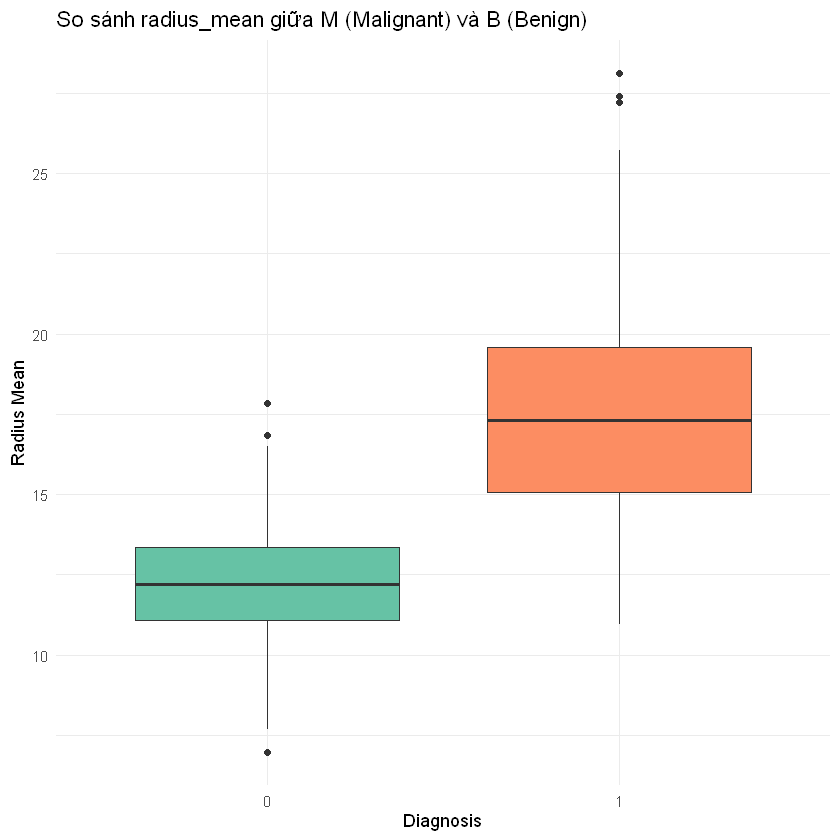

In [18]:
# Boxplot So Sánh Giữa 2 Loại Diagnosis
# Cài theme
theme_set(theme_minimal())

# Vẽ boxplot
ggplot(df, aes(x = as.factor(diagnosis), y = radius_mean_target, fill = as.factor(diagnosis))) +
  geom_boxplot() +
  scale_fill_manual(values = c("#66C2A5", "#FC8D62")) +
  labs(title = "So sánh radius_mean giữa M (Malignant) và B (Benign)",
       x = "Diagnosis", y = "Radius Mean") +
  theme(legend.position = "none")


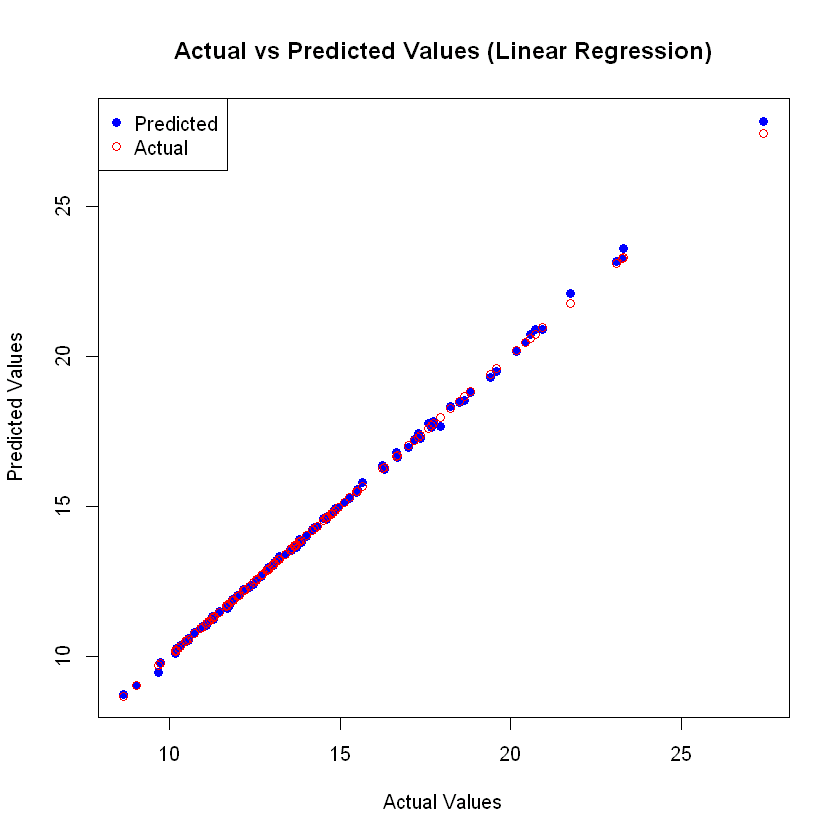

In [19]:
# Scatter plot thực tế vs dự đoán
plot(y_test, y_pred_linear, col = "blue", pch = 16,
     xlab = "Actual Values", ylab = "Predicted Values",
     main = "Actual vs Predicted Values (Linear Regression)")
points(y_test, y_test, col = "red", pch = 1)
legend("topleft", legend = c("Predicted", "Actual"),
       col = c("blue", "red"), pch = c(16, 1))


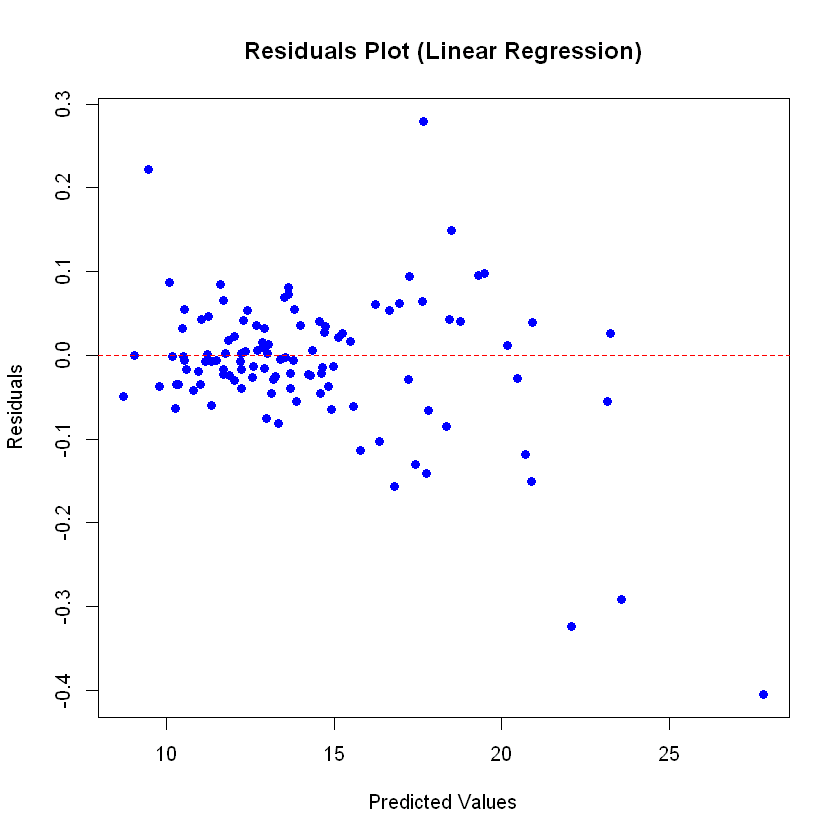

In [20]:
# Biểu đồ residual
residuals_linear <- y_test - y_pred_linear

plot(y_pred_linear, residuals_linear, col = "blue", pch = 16,
     xlab = "Predicted Values", ylab = "Residuals",
     main = "Residuals Plot (Linear Regression)")
abline(h = 0, col = "red", lty = 2)



Attaching package: 'modelr'


The following objects are masked from 'package:Metrics':

    mae, mape, mse, rmse




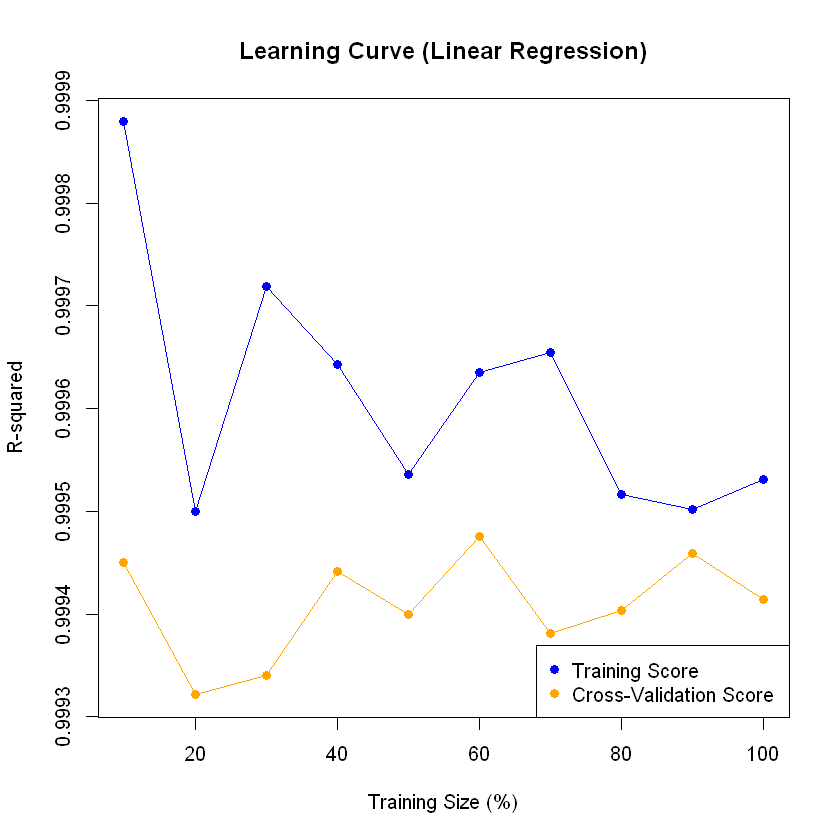

In [21]:
# Learning Curve thủ công cho Linear Regression
library(modelr)

train_sizes <- seq(0.1, 1.0, length.out = 10)
train_scores <- c()
test_scores <- c()

set.seed(42)
for (size in train_sizes) {
  idx <- sample(1:nrow(X_train), size = floor(size * nrow(X_train)))
  X_partial <- X_train[idx, ]
  y_partial <- y_train[idx]

  model_partial <- lm(y_partial ~ ., data = X_partial)

  # Đánh giá trên tập train
  pred_train <- predict(model_partial, newdata = X_partial)
  r2_train <- R2_Score(pred_train, y_partial)
  train_scores <- c(train_scores, r2_train)

  # Đánh giá trên tập test
  pred_test <- predict(model_partial, newdata = X_test)
  r2_test <- R2_Score(pred_test, y_test)
  test_scores <- c(test_scores, r2_test)
}

# Vẽ Learning Curve
plot(train_sizes * 100, train_scores, type = "o", col = "blue", pch = 16,
     xlab = "Training Size (%)", ylab = "R-squared",
     main = "Learning Curve (Linear Regression)",
     ylim = range(c(train_scores, test_scores)))
lines(train_sizes * 100, test_scores, type = "o", col = "orange", pch = 16)
legend("bottomright", legend = c("Training Score", "Cross-Validation Score"),
       col = c("blue", "orange"), pch = 16)


# Random Forest

In [22]:
# -----------------------
# 2. Random Forest
# -----------------------
library(randomForest)

# Huấn luyện Random Forest
rf_reg <- randomForest(x = X_train, y = y_train, ntree = 100, random_state = 42)

# Dự đoán
y_pred_rf <- predict(rf_reg, X_test)

# Hiển thị kết quả dự đoán
print(y_pred_rf)


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




        1         2         3         4         5         6         7         8 
18.335600 13.867142 13.608317 13.166478 17.589055 14.569193 17.295920 11.782955 
        9        10        11        12        13        14        15        16 
 9.977680 11.301755  9.180147 12.006907 12.205628 10.495791 17.742152 18.579562 
       17        18        19        20        21        22        23        24 
11.195787 10.861083 14.918777 13.175185 17.868168 11.718850 12.349043 22.336410 
       25        26        27        28        29        30        31        32 
10.797802  8.582544 12.912767 15.199163 14.908495 12.293330 22.923420 13.825047 
       33        34        35        36        37        38        39        40 
10.172262 10.132458 14.414267 13.934098 11.329693 20.890362 16.982642 17.239562 
       41        42        43        44        45        46        47        48 
17.497183 17.366675 21.598530 13.507387 21.871440  9.717301 19.257397 12.879693 
       49        50        5

In [23]:
mse_rf <- mean((y_test - y_pred_rf)^2)
mae_rf <- mean(abs(y_test - y_pred_rf))
rmse_rf <- sqrt(mse_rf)
r2_rf <- R2_Score(y_pred_rf, y_test)

cat(sprintf("Mean Squared Error: %f\n", mse_rf))
cat(sprintf("Mean Absolute Error: %f\n", mae_rf))
cat(sprintf("Root Mean Squared Error: %f\n", rmse_rf))
cat(sprintf("R-squared: %f\n", r2_rf))


Mean Squared Error: 0.074865
Mean Absolute Error: 0.148331
Root Mean Squared Error: 0.273614
R-squared: 0.993931


In [24]:
saveRDS(rf_reg, "random_forest_model.rds")


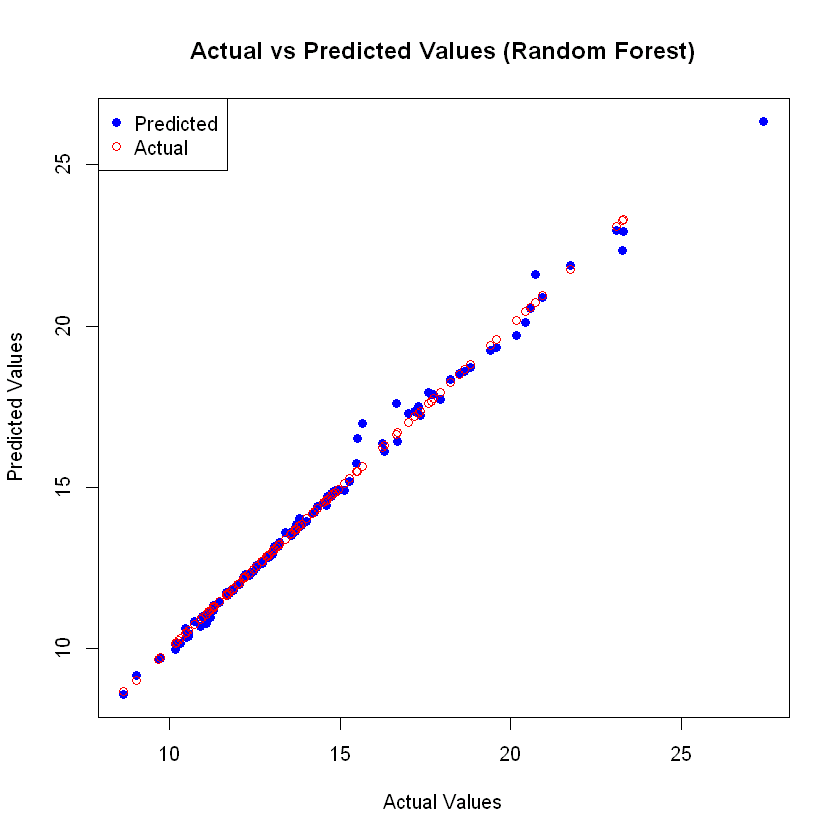

In [25]:
# Scatter plot dự đoán với thực tế
plot(y_test, y_pred_rf, col = "blue", pch = 16,
     xlab = "Actual Values", ylab = "Predicted Values",
     main = "Actual vs Predicted Values (Random Forest)")
points(y_test, y_test, col = "red", pch = 1)
legend("topleft", legend = c("Predicted", "Actual"), col = c("blue", "red"), pch = c(16, 1))


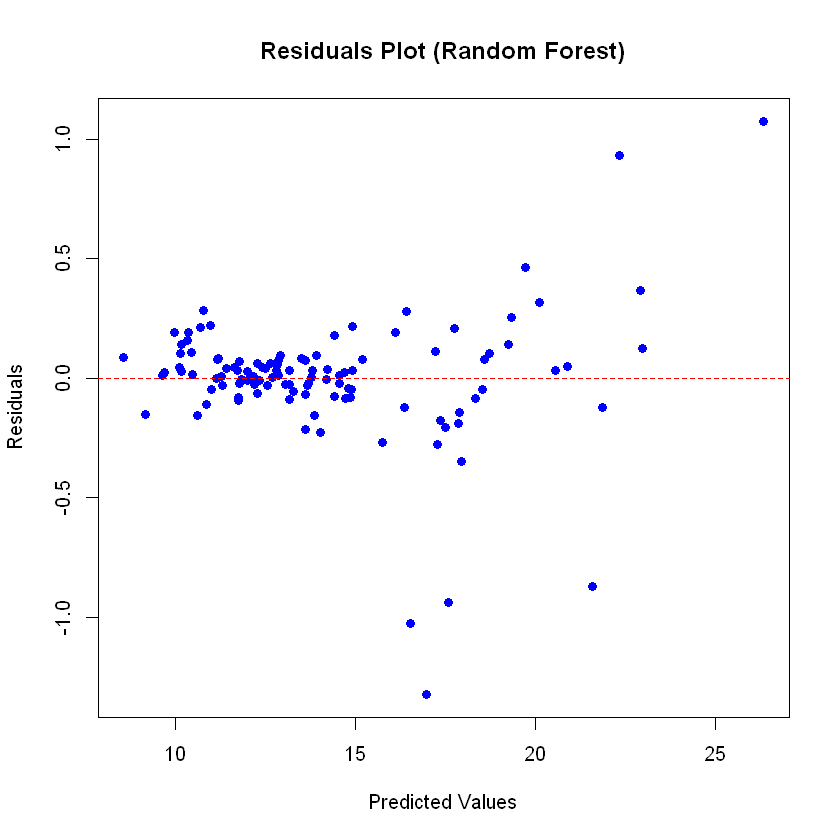

In [26]:
# Residual plot
residuals_rf <- y_test - y_pred_rf
plot(y_pred_rf, residuals_rf, col = "blue", pch = 16,
     xlab = "Predicted Values", ylab = "Residuals",
     main = "Residuals Plot (Random Forest)")
abline(h = 0, col = "red", lty = 2)


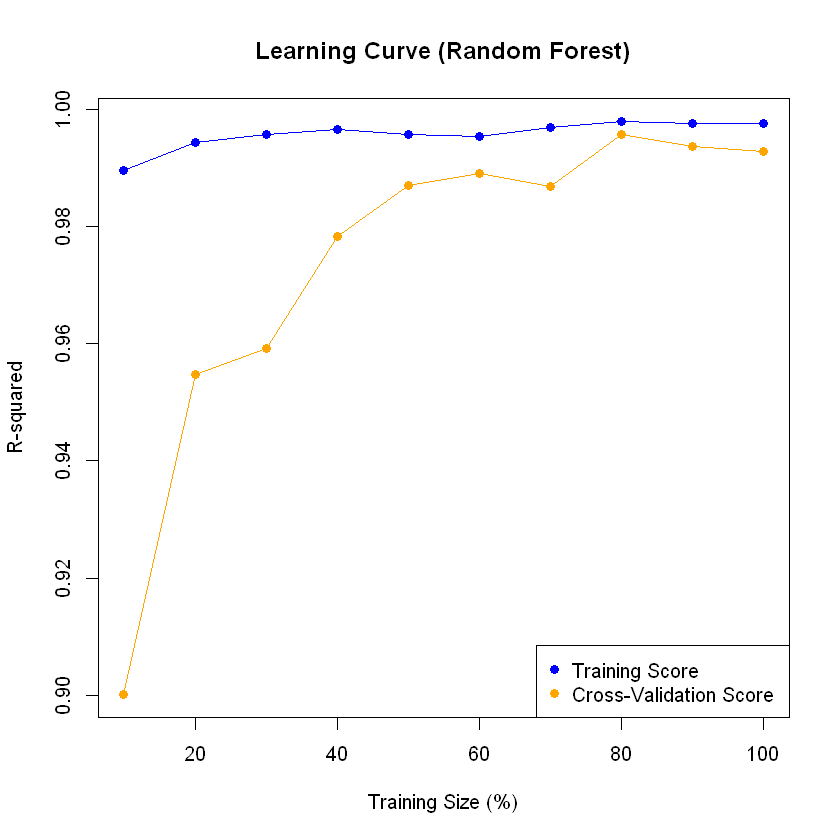

In [27]:
train_scores_rf <- c()
test_scores_rf <- c()

for (size in train_sizes) {
  idx <- sample(1:nrow(X_train), size = floor(size * nrow(X_train)))
  X_partial <- X_train[idx, ]
  y_partial <- y_train[idx]

  model_rf_partial <- randomForest(x = X_partial, y = y_partial, ntree = 100)

  pred_train <- predict(model_rf_partial, X_partial)
  r2_train <- R2_Score(pred_train, y_partial)
  train_scores_rf <- c(train_scores_rf, r2_train)

  pred_test <- predict(model_rf_partial, X_test)
  r2_test <- R2_Score(pred_test, y_test)
  test_scores_rf <- c(test_scores_rf, r2_test)
}

plot(train_sizes * 100, train_scores_rf, type = "o", col = "blue", pch = 16,
     xlab = "Training Size (%)", ylab = "R-squared",
     main = "Learning Curve (Random Forest)",
     ylim = range(c(train_scores_rf, test_scores_rf)))
lines(train_sizes * 100, test_scores_rf, type = "o", col = "orange", pch = 16)
legend("bottomright", legend = c("Training Score", "Cross-Validation Score"),
       col = c("blue", "orange"), pch = 16)


In [28]:
# -----------------------
# 3. XGBoost
# -----------------------
library(xgboost)

# # Huấn luyện Random Forest
# rf_reg <- randomForest(x = X_train, y = y_train, ntree = 100, random_state = 42)

# # Dự đoán
# y_pred_rf <- predict(rf_reg, X_test)

# # Hiển thị kết quả dự đoán
# print(y_pred_rf)

# Chuẩn bị dữ liệu cho xgboost
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dtest <- xgb.DMatrix(data = as.matrix(X_test))

# Huấn luyện mô hình
XGB_reg <- xgboost(data = dtrain, nrounds = 100, objective = "reg:squarederror", verbose = 0)

# Dự đoán
y_pred_xgb <- predict(XGB_reg, dtest)

# Hiển thị dự đoán
print(y_pred_xgb)



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




  [1] 18.154671 13.779535 13.452924 13.189867 17.051123 14.371041 16.965864
  [8] 11.738122  9.709340 11.379433  9.163949 11.909392 12.213607 10.548761
 [15] 17.937962 18.766069 11.080758 10.961034 15.103183 13.127625 17.805016
 [22] 11.791570 12.324390 23.199150 10.930667  8.712481 13.104645 15.137796
 [29] 14.835614 12.266919 23.536160 13.760839 10.464069 10.395176 14.383516
 [36] 13.964210 11.380389 20.738905 15.732773 17.106058 17.032442 17.296127
 [43] 21.048347 13.420625 22.286528  9.760017 19.163099 12.906447 12.737157
 [50] 11.446758 11.840896 12.692158 10.854646 14.382749 10.380916 12.360188
 [57] 13.044004 14.652537 12.215373 12.779655 12.179358 14.675922 11.446095
 [64] 11.621365 12.808943 12.632339 20.377546 10.366541 15.642887 12.817050
 [71] 12.313951 15.033935 16.017292 12.727839 11.043510 13.657408 10.594719
 [78] 20.305929 18.880255 12.805781 13.755176 10.394760 18.036186 14.888932
 [85] 14.643149 11.811239 19.309927 28.040283 13.409517 17.799454 12.113501
 [92] 14.008

In [29]:
mse_xgb <- mean((y_test - y_pred_xgb)^2)
mae_xgb <- mean(abs(y_test - y_pred_xgb))
rmse_xgb <- sqrt(mse_xgb)
r2_xgb <- R2_Score(y_pred_xgb, y_test)

cat(sprintf("Mean Squared Error: %f\n", mse_xgb))
cat(sprintf("Mean Absolute Error: %f\n", mae_xgb))
cat(sprintf("Root Mean Squared Error: %f\n", rmse_xgb))
cat(sprintf("R-squared: %f\n", r2_xgb))


Mean Squared Error: 0.028248
Mean Absolute Error: 0.124044
Root Mean Squared Error: 0.168072
R-squared: 0.997710


In [30]:
xgb.save(XGB_reg, "xgboost_model.model")


[1] TRUE

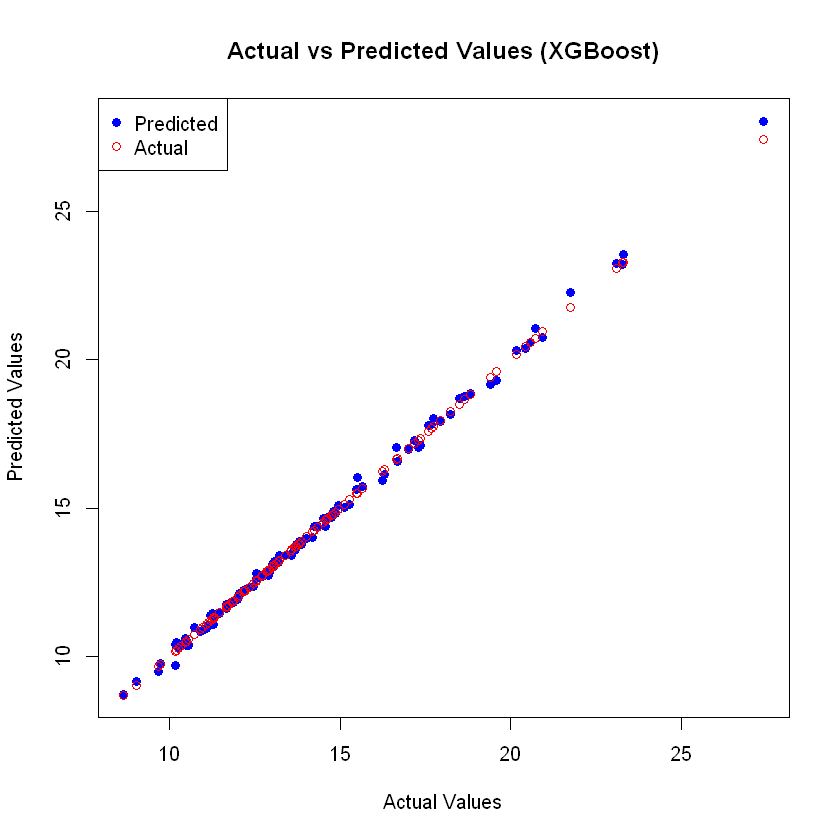

In [31]:
# Scatter plot dự đoán và thực tế
plot(y_test, y_pred_xgb, col = "blue", pch = 16,
     xlab = "Actual Values", ylab = "Predicted Values",
     main = "Actual vs Predicted Values (XGBoost)")
points(y_test, y_test, col = "red", pch = 1)
legend("topleft", legend = c("Predicted", "Actual"), col = c("blue", "red"), pch = c(16, 1))


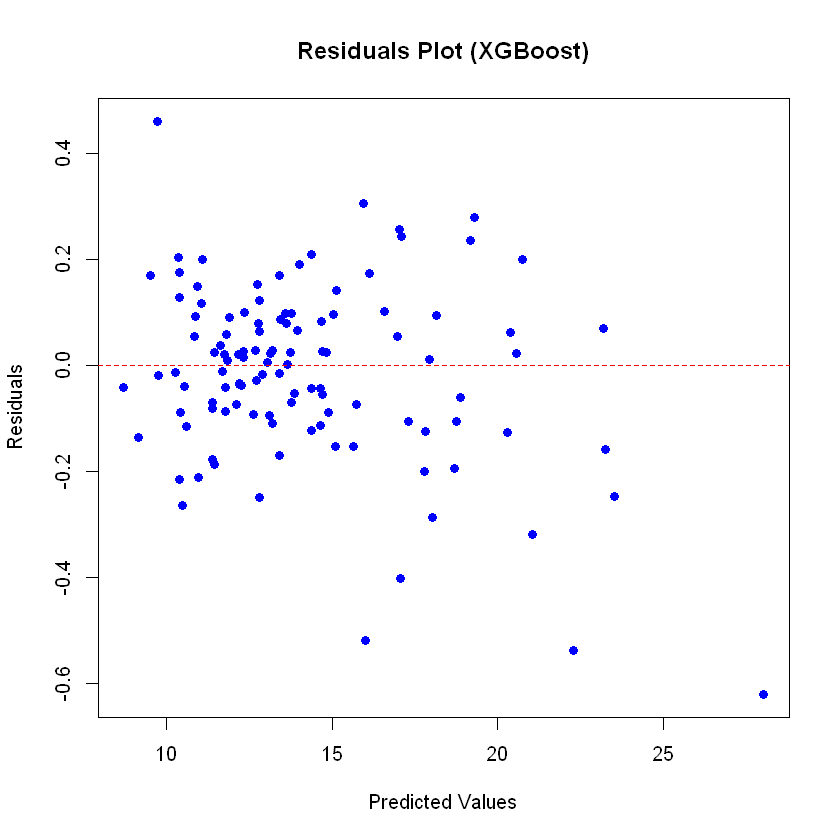

In [32]:
# Residual plot
residuals_xgb <- y_test - y_pred_xgb
plot(y_pred_xgb, residuals_xgb, col = "blue", pch = 16,
     xlab = "Predicted Values", ylab = "Residuals",
     main = "Residuals Plot (XGBoost)")
abline(h = 0, col = "red", lty = 2)


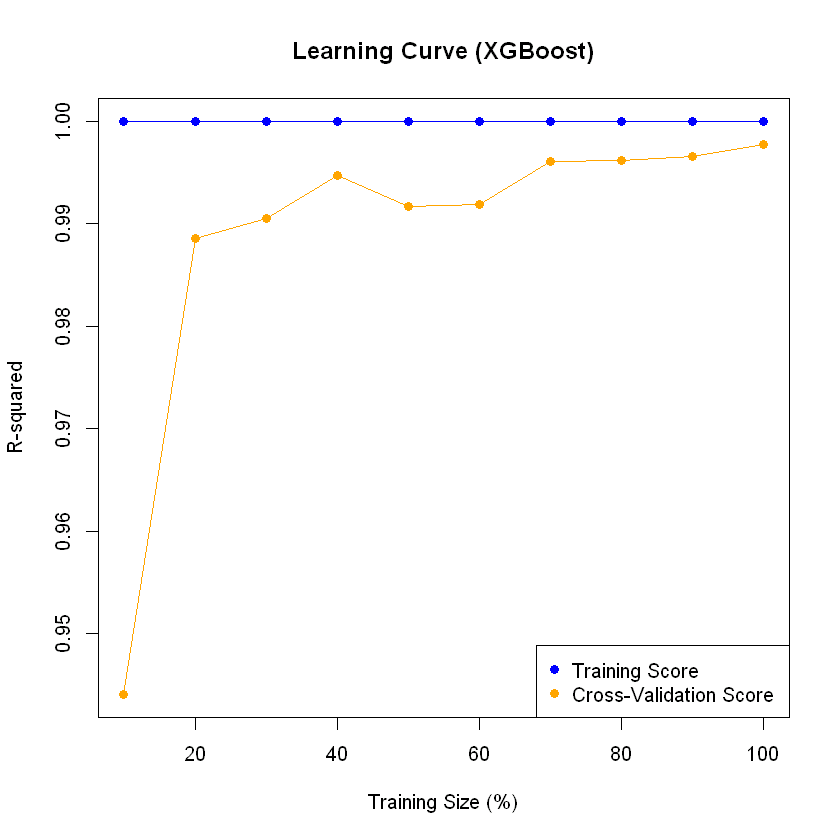

In [33]:
train_scores_xgb <- c()
test_scores_xgb <- c()

for (size in train_sizes) {
  idx <- sample(1:nrow(X_train), size = floor(size * nrow(X_train)))
  X_partial <- X_train[idx, ]
  y_partial <- y_train[idx]

  dpartial <- xgb.DMatrix(data = as.matrix(X_partial), label = y_partial)
  model_xgb_partial <- xgboost(data = dpartial, nrounds = 100, objective = "reg:squarederror", verbose = 0)

  r2_train <- R2_Score(predict(model_xgb_partial, dpartial), y_partial)
  r2_test <- R2_Score(predict(model_xgb_partial, dtest), y_test)

  train_scores_xgb <- c(train_scores_xgb, r2_train)
  test_scores_xgb <- c(test_scores_xgb, r2_test)
}

plot(train_sizes * 100, train_scores_xgb, type = "o", col = "blue", pch = 16,
     xlab = "Training Size (%)", ylab = "R-squared",
     main = "Learning Curve (XGBoost)",
     ylim = range(c(train_scores_xgb, test_scores_xgb)))
lines(train_sizes * 100, test_scores_xgb, type = "o", col = "orange", pch = 16)
legend("bottomright", legend = c("Training Score", "Cross-Validation Score"),
       col = c("blue", "orange"), pch = 16)


In [34]:
# Summary
summary_df <- data.frame(
  Model = c("Linear Regression", "Random Forest", "XGBoost"),
  MSE = c(mse_linear, mse_rf, mse_xgb),
  MAE = c(mae_linear, mae_rf, mae_xgb),
  RMSE = c(rmse_linear, rmse_rf, rmse_xgb),
  R2 = c(r2_score_linear, r2_rf, r2_xgb)
)
print(summary_df)


              Model         MSE        MAE       RMSE        R2
1 Linear Regression 0.007229618 0.05414378 0.08502716 0.9994139
2     Random Forest 0.074864603 0.14833147 0.27361397 0.9939309
3           XGBoost 0.028248077 0.12404385 0.16807164 0.9977100
